In [1]:
import random
import operator
import datetime
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from matplotlib.patches import Circle

In [2]:
# 100個常態分佈的測試資料-類別1
# normal(平均值,標準差,數量)
class1_heights = np.random.normal(50, 6, 100)
class1_weights = np.random.normal(5, 0.7, 100)

# 100個常態分佈的測試資料-類別2
class2_heights = np.random.normal(30,6,100)
class2_weights = np.random.normal(4,0.7,100)

# 100個常態分佈的測試資料-類別3
class3_heights = np.random.normal(45,6,100)
class3_weights = np.random.normal(2.5, 0.7, 100)

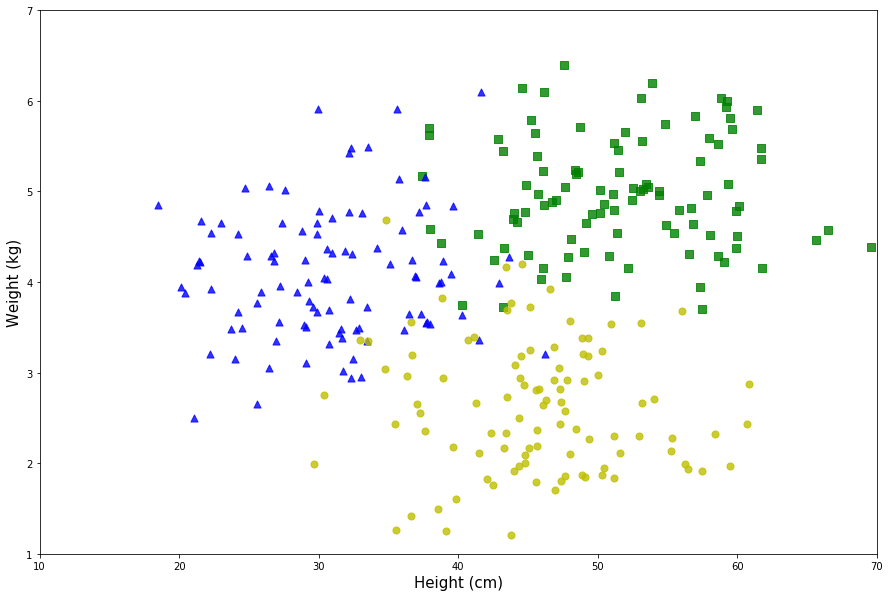

In [3]:
plt.figure(figsize=(15,10))

plt.scatter(class1_heights,class1_weights,c='g',marker='s',s=50,alpha=0.8)
plt.scatter(class2_heights,class2_weights,c='b',marker='^',s=50,alpha=0.8)
plt.scatter(class3_heights,class3_weights,c='y',marker='o',s=50,alpha=0.8)

plt.axis((10, 70,1,7))
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)

plt.show()

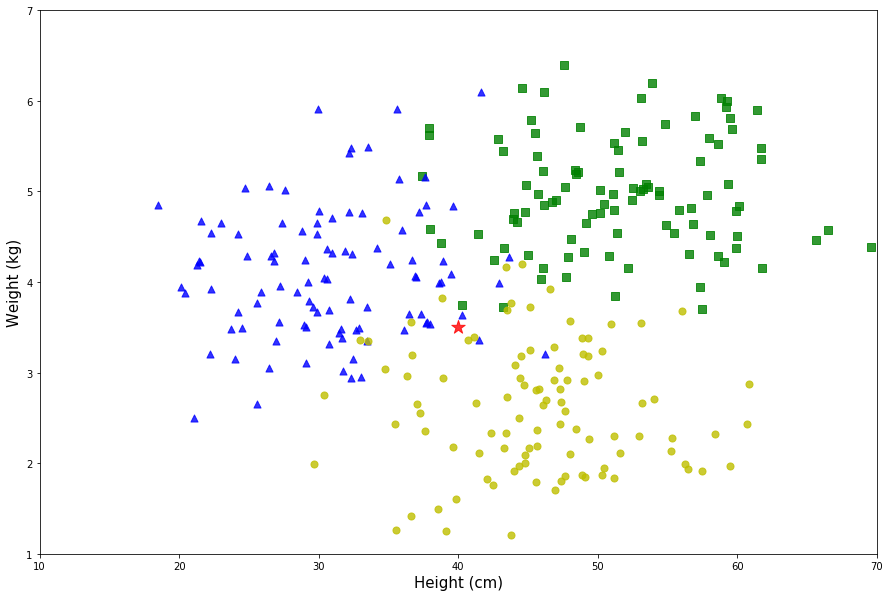

In [4]:
plt.figure(figsize=(15,10))

plt.scatter(class1_heights,class1_weights,c='g',marker='s',s=50,alpha=0.8)
plt.scatter(class2_heights,class2_weights,c='b',marker='^',s=50,alpha=0.8)
plt.scatter(class3_heights,class3_weights,c='y',marker='o',s=50,alpha=0.8)

# 請預測此樣本的類別(class1,2,3 ?)
plt.scatter(40,3.5, c='r', s=200, marker='*',alpha=0.8)

plt.axis((10, 70,1,7))
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)

plt.show()

In [5]:
X = np.vstack((np.array([class1_heights,class1_weights]),np.array([class2_heights,class2_weights]),np.array([class3_heights,class3_weights])))
y = np.hstack((np.full((100,),1),np.full((100,),2),np.full((100,),3)))

In [6]:
x1 = np.vstack((np.array([class1_heights]),np.array([class1_weights]))).T
x2 = np.vstack((np.array([class2_heights]),np.array([class2_weights]))).T
x3 = np.vstack((np.array([class3_heights]),np.array([class3_weights]))).T
X = np.vstack((x1,x2,x3))

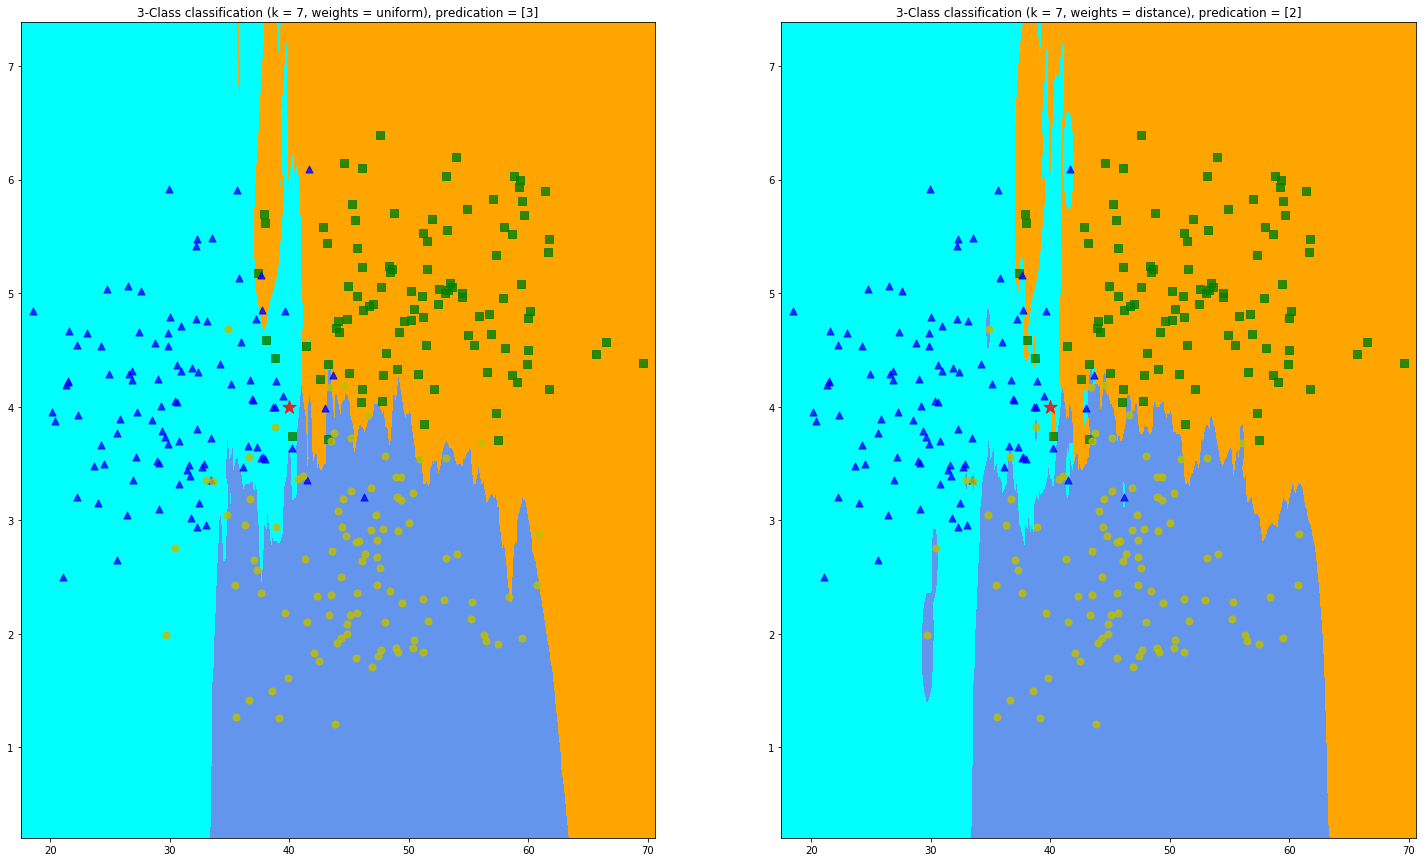

In [7]:
n_neighbors = 7
h = .02
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

fig,ax = plt.subplots(1,2,figsize=(25,15))
for i,weights in zip([0,1],['uniform', 'distance']):
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    pred_class = clf.predict(np.array([[40,3.5]]))
    n_dist,n_indx = clf.kneighbors(np.array([[40,3.5]]))
    
    ax[i].pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax[i].scatter(class1_heights,class1_weights,c='g',marker='s',s=50,alpha=0.8)
    ax[i].scatter(class2_heights,class2_weights,c='b',marker='^',s=50,alpha=0.8)
    ax[i].scatter(class3_heights,class3_weights,c='y',marker='o',s=50,alpha=0.8)    
    ax[i].scatter(40,4, c='r', s=200, marker='*',alpha=0.8)
    
    ax[i].set_xlim(xx.min(), xx.max())
    ax[i].set_ylim(yy.min(), yy.max())
    ax[i].set_title("3-Class classification (k = {}, weights = {}), predication = {}".format(n_neighbors, weights,pred_class))

plt.show()

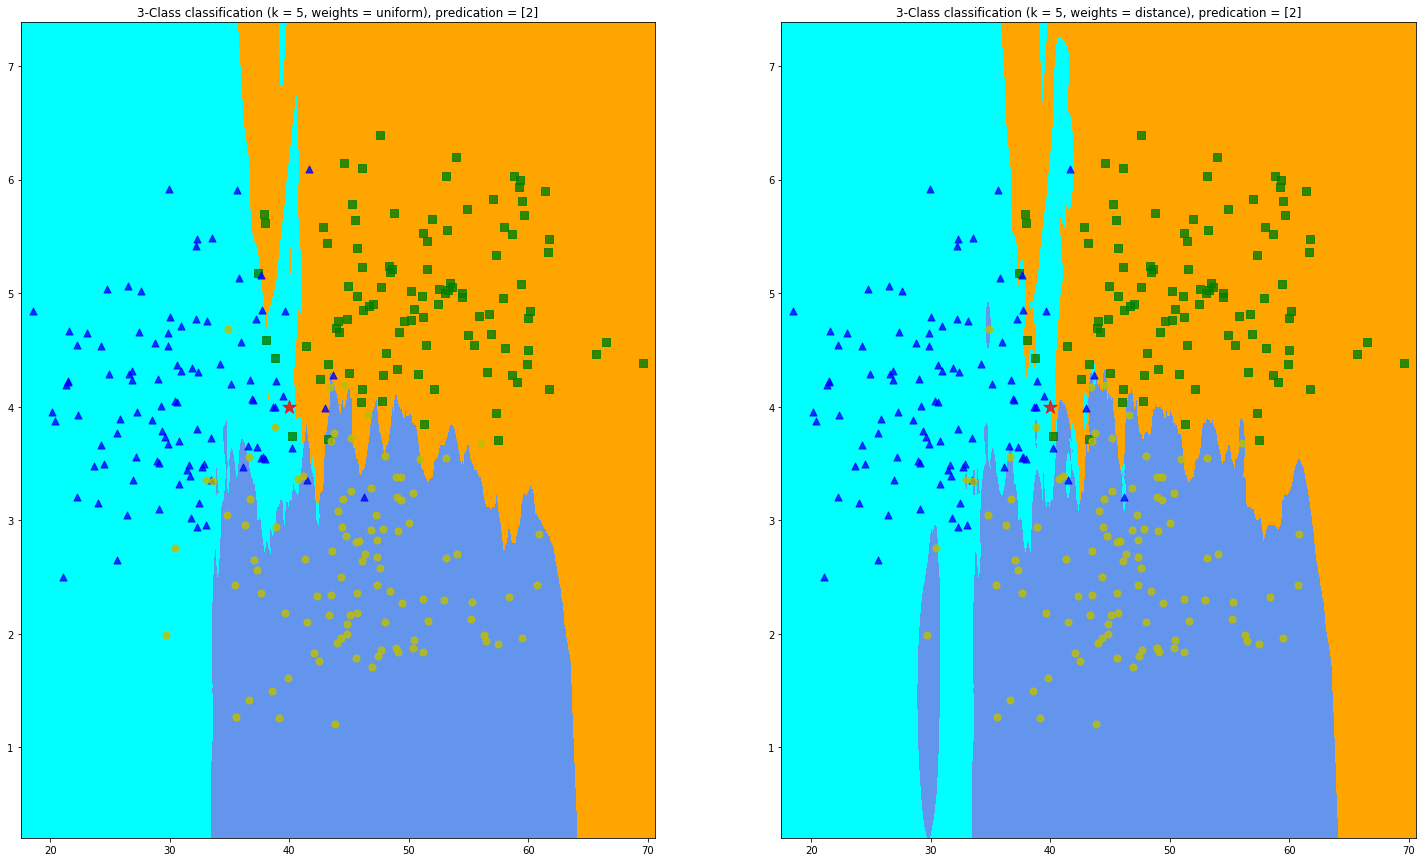

In [8]:
n_neighbors = 5
h = .02
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

fig,ax = plt.subplots(1,2,figsize=(25,15))
for i,weights in zip([0,1],['uniform', 'distance']):
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    pred_class = clf.predict(np.array([[40,3.5]]))
    n_dist,n_indx = clf.kneighbors(np.array([[40,3.5]]))
    
    ax[i].pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax[i].scatter(class1_heights,class1_weights,c='g',marker='s',s=50,alpha=0.8)
    ax[i].scatter(class2_heights,class2_weights,c='b',marker='^',s=50,alpha=0.8)
    ax[i].scatter(class3_heights,class3_weights,c='y',marker='o',s=50,alpha=0.8)    
    ax[i].scatter(40,4, c='r', s=200, marker='*',alpha=0.8)
    
    ax[i].set_xlim(xx.min(), xx.max())
    ax[i].set_ylim(yy.min(), yy.max())
    ax[i].set_title("3-Class classification (k = {}, weights = {}), predication = {}".format(n_neighbors, weights,pred_class))

plt.show()

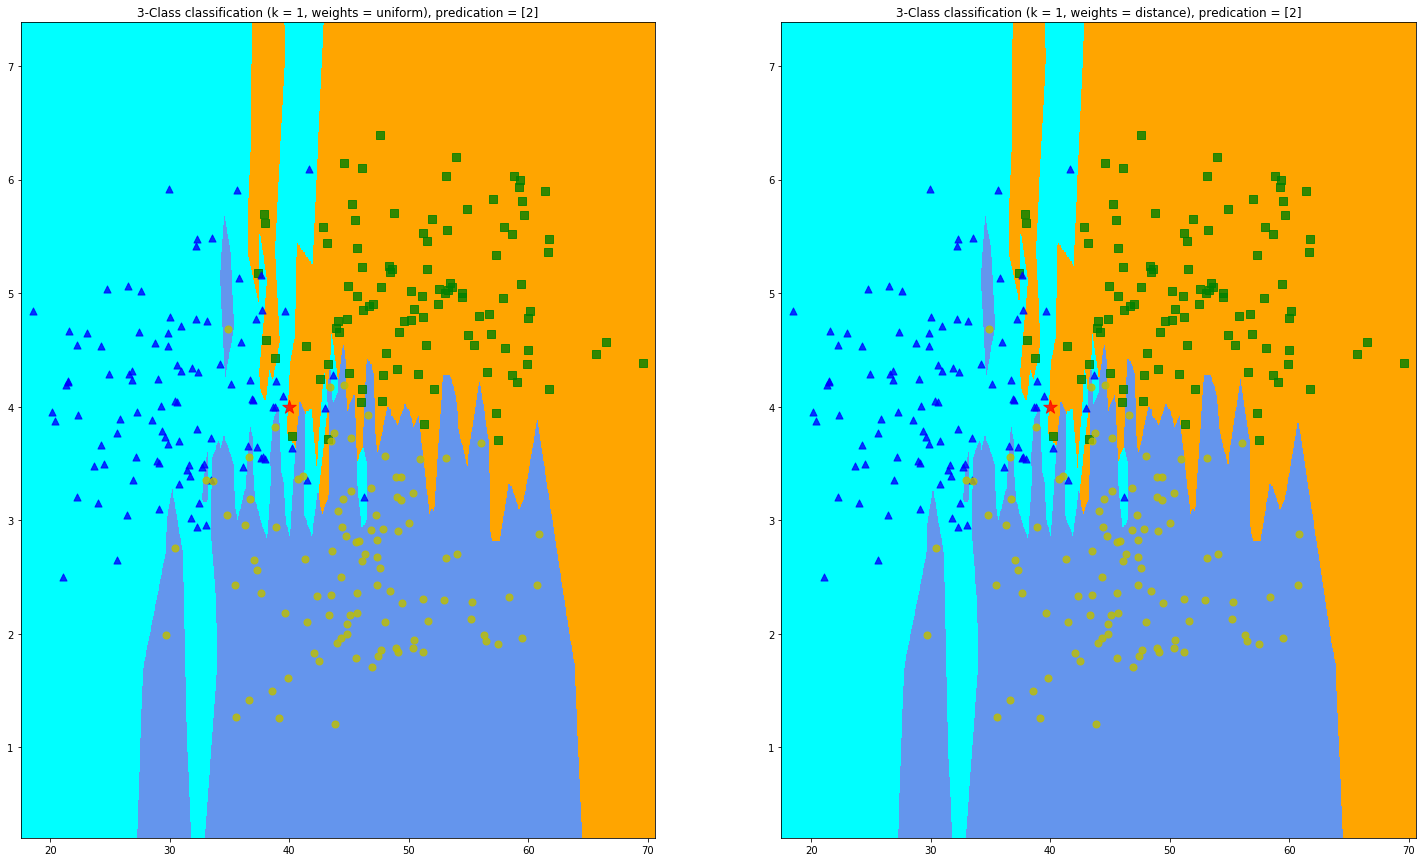

In [9]:
n_neighbors = 1
h = .02
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

fig,ax = plt.subplots(1,2,figsize=(25,15))
for i,weights in zip([0,1],['uniform', 'distance']):
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    pred_class = clf.predict(np.array([[40,3.5]]))
    n_dist,n_indx = clf.kneighbors(np.array([[40,3.5]]))
    
    ax[i].pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax[i].scatter(class1_heights,class1_weights,c='g',marker='s',s=50,alpha=0.8)
    ax[i].scatter(class2_heights,class2_weights,c='b',marker='^',s=50,alpha=0.8)
    ax[i].scatter(class3_heights,class3_weights,c='y',marker='o',s=50,alpha=0.8)    
    ax[i].scatter(40,4, c='r', s=200, marker='*',alpha=0.8)
    
    ax[i].set_xlim(xx.min(), xx.max())
    ax[i].set_ylim(yy.min(), yy.max())
    ax[i].set_title("3-Class classification (k = {}, weights = {}), predication = {}".format(n_neighbors, weights,pred_class))

plt.show()